### Steps for PCA & K-means
1. Load and Standardize data
2. Run PCA to reduce dimensionality
3. Use PCA to find important features
4. Hyperparameter tuning
5. Apply k means

In [57]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn import metrics

import matplotlib.pyplot as plt


In [24]:
# loading dataset
df = pd.read_csv("../Data/centralities.csv")

# checking data shape
row, col = df.shape
print(f'There are {row} rows and {col} columns') 

print(df.head(5))


There are 20 rows and 12 columns
   Unnamed: 0                                          in_degree  \
0        1609  [ 0.  1.  0.  2.  2.  0.  2.  8.  3. 12. 16.  ...   
1        1631  [ 1.  0.  0.  1.  2.  0.  1.  2.  1.  0.  2.  ...   
2        1625  [ 0.  0.  0.  0.  2.  0.  1.  8.  0. 11. 14.  ...   
3        1646  [ 0.  1.  0.  1.  3.  1.  0.  1.  0.  2.  1.  ...   
4        1610  [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  5.  5.  ...   

                                          out_degree  avg_in_degree  \
0  [ 0.  1.  0.  4.  2.  1.  3.  9.  4. 13. 19. 1...       8.222222   
1  [1. 1. 0. 1. 4. 0. 1. 2. 2. 1. 4. 1. 5. 7. 0. ...       2.333333   
2  [ 0.  0.  0.  0.  3.  1.  2.  9.  2. 14. 19.  ...      10.222222   
3  [0. 1. 0. 2. 4. 1. 0. 3. 1. 2. 1. 3. 2. 3. 3. ...       2.000000   
4  [ 0.  0.  0.  0.  1.  1.  1.  3.  0.  6.  5.  ...       2.944444   

   avg_out_degree                                    clustering_coef  \
0        8.222222  {0: 0, 1: 0, 2: 0, 3: 0.0, 4: 0.0, 5: 0,

In [25]:
df = df[['avg_in_degree', 'avg_clustering_coef', 'avg_betweenness', 'avg_pagerank', 'max_clique']]

In [30]:
normalized_df=(df-df.mean())/df.std()

In [118]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(normalized_df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))



Explained variation per principal component: [0.59058117 0.1953266 ]
Cumulative variance explained by 2 principal components: 78.59%


In [42]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=normalized_df.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)



       avg_in_degree  avg_clustering_coef  avg_betweenness  avg_pagerank  \
PC_1       0.541222             0.224422         0.481232      0.430899   
PC_2       0.106602             0.903338         0.207317      0.359868   

      max_clique  
PC_1    0.489341  
PC_2    0.011424  


In [43]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 avg_in_degree      0.541222
avg_betweenness    0.481232
avg_pagerank       0.430899
max_clique         0.489341
Name: PC_1, dtype: float64


As per PC 2:
 avg_clustering_coef    0.903338
avg_pagerank           0.359868
Name: PC_2, dtype: float64

******************************************************************


In [96]:
pca = PCA(2)
data = pca.fit_transform(normalized_df)

Parameter: {'n_clusters': 2} Score 0.4454886155007248
Parameter: {'n_clusters': 3} Score 0.2881687131766885
Parameter: {'n_clusters': 4} Score 0.23513987850872137
Parameter: {'n_clusters': 5} Score 0.29827109550929765
Parameter: {'n_clusters': 6} Score 0.32838798711438794
Parameter: {'n_clusters': 7} Score 0.35584676546890903
Parameter: {'n_clusters': 8} Score 0.3354875558156241
Parameter: {'n_clusters': 9} Score 0.4812683137597792
Parameter: {'n_clusters': 10} Score 0.49034022728342447


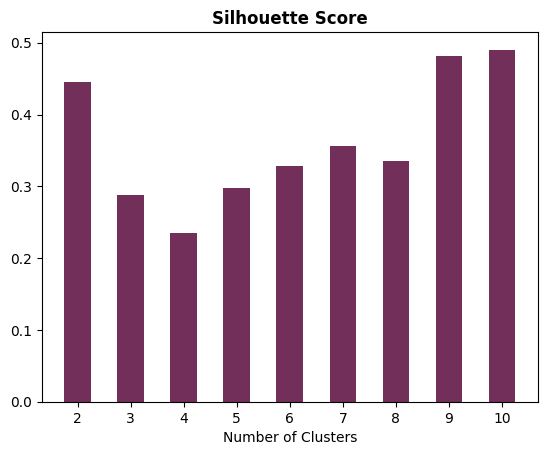

In [107]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []

# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    
    kmeans_model.fit(normalized_df) 
    ss = metrics.silhouette_score(normalized_df, kmeans_model.labels_)  
    silhouette_scores += [ss] 
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

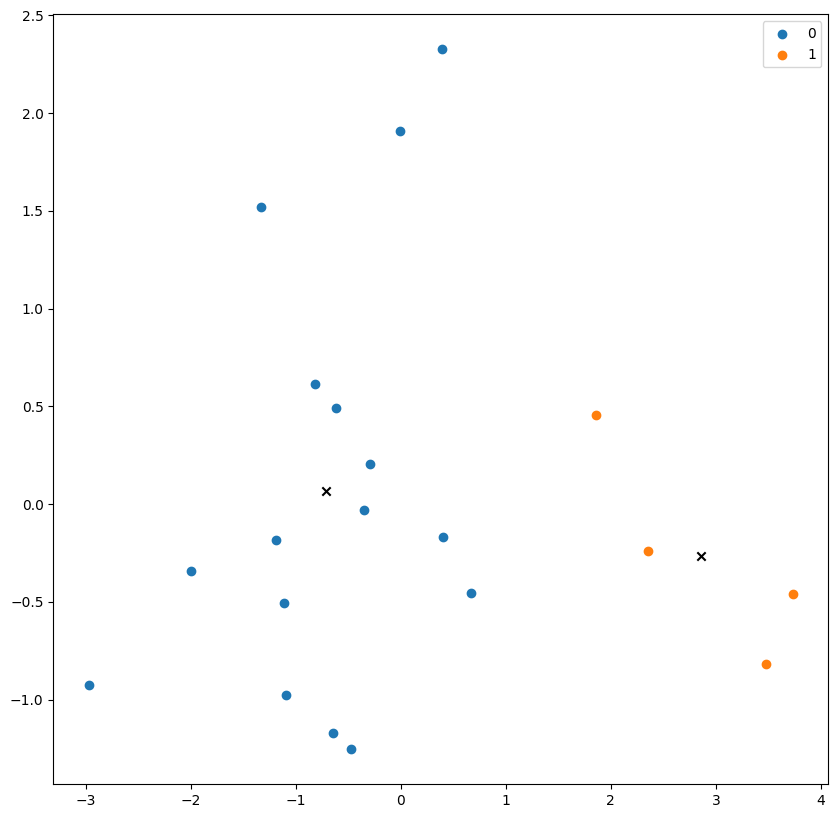

In [109]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

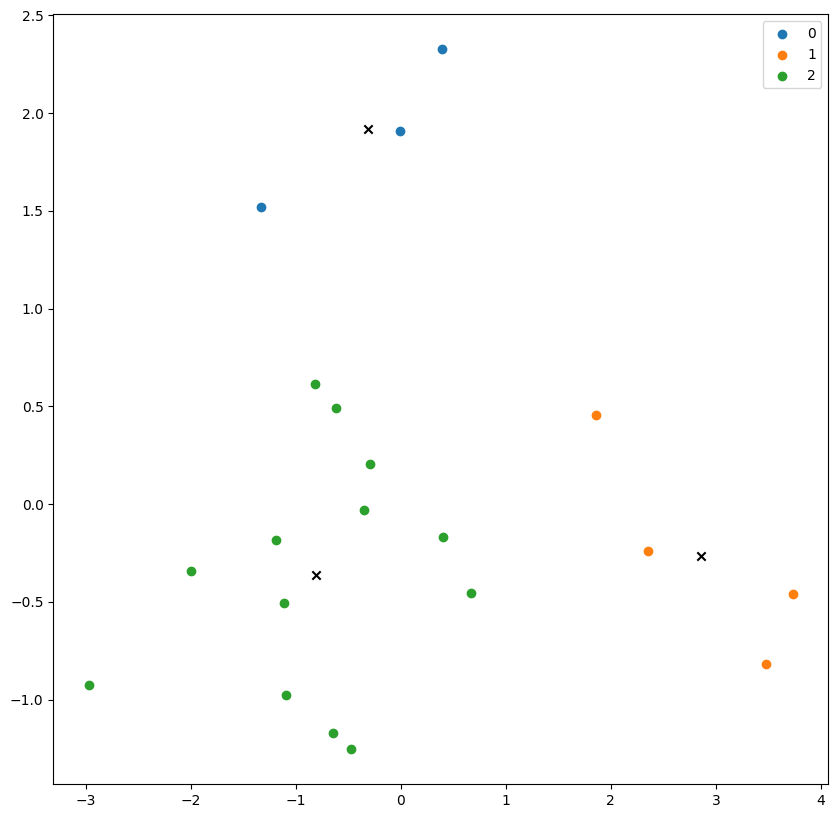

In [114]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()